In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scienceplots
import os
import seaborn as sns

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


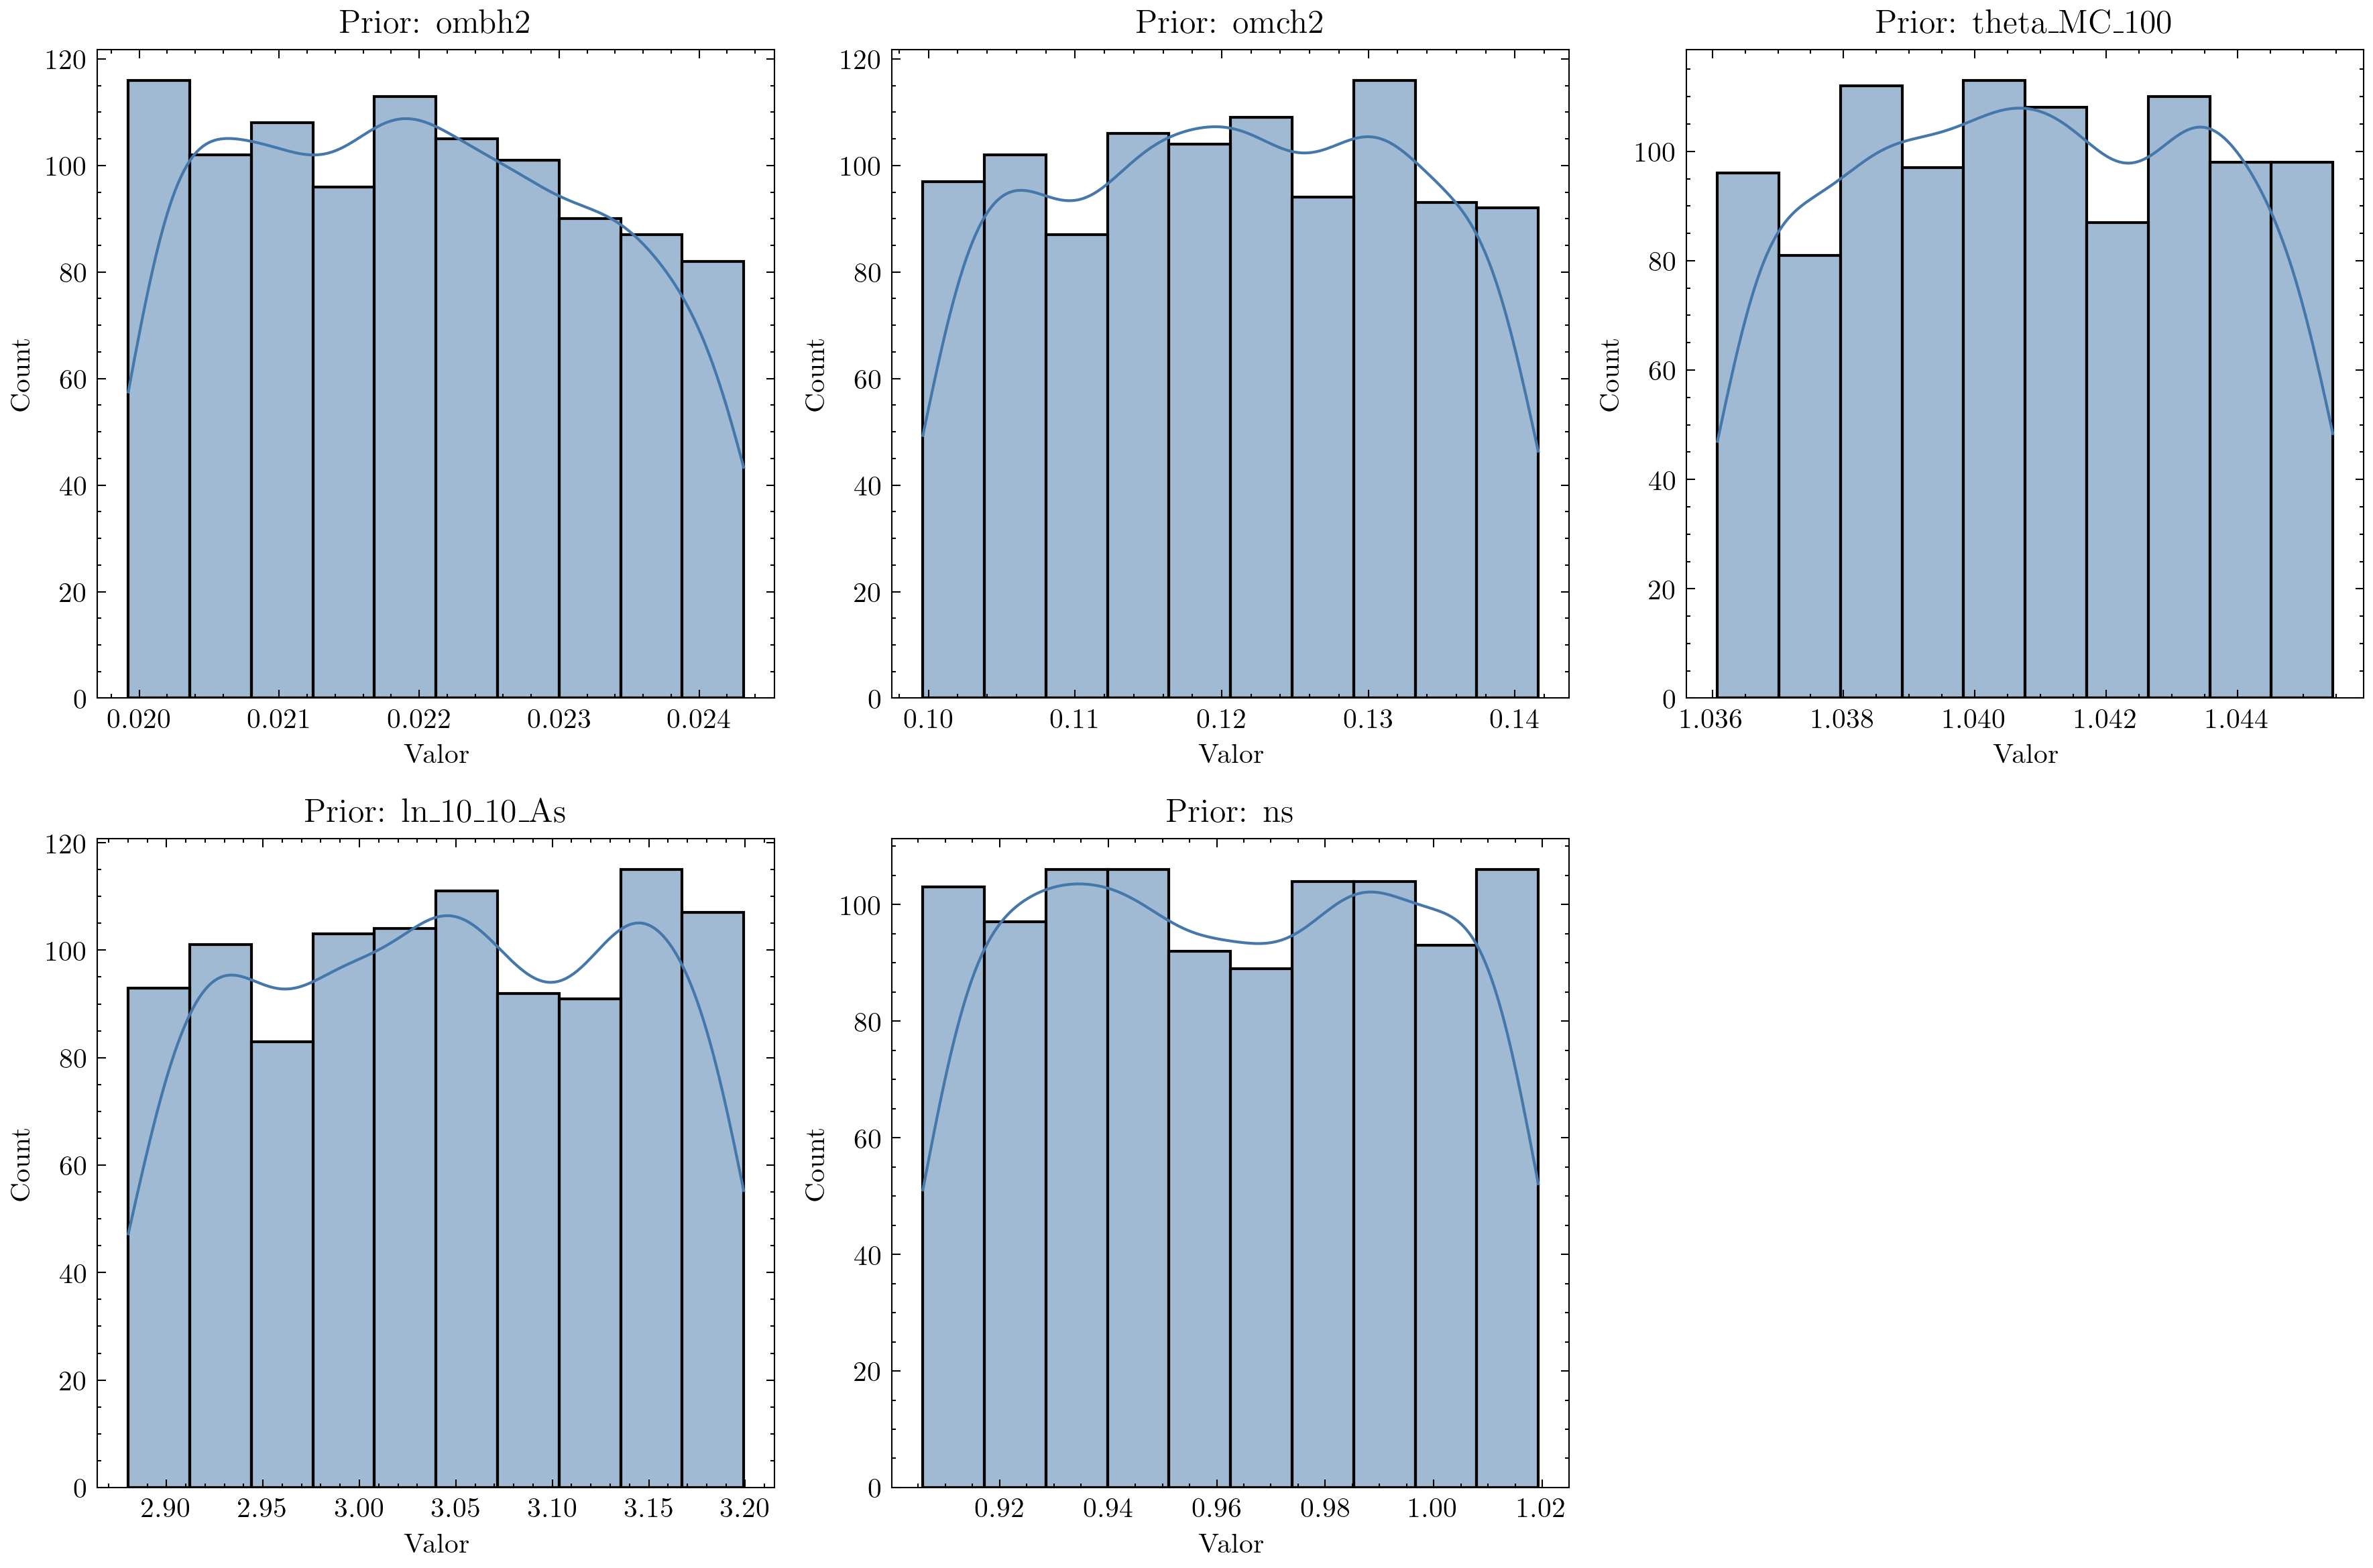

In [2]:
from src.simulator.prior import get_prior
from src.simulator.config import PARAM_RANGES

prior = get_prior()
prior_samples = prior.sample((1000,))
param_names = list(PARAM_RANGES.keys())

plt.figure(figsize=(12, 8))
for i, name in enumerate(param_names):
    plt.subplot(2, 3, i+1)
    sns.histplot(prior_samples[:, i].numpy(), bins=10, kde=True)
    plt.title(f"Prior: {name}")
    plt.xlabel("Valor")
plt.tight_layout()
plt.show()

In [3]:
base_spectra = torch.load(os.path.join("..","data","examples","spectra.pt"), weights_only=True)
base_params = torch.load(os.path.join("..","data","examples","params.pt"), weights_only=True) 

print(f"Shape of spectra: {base_spectra.shape}")
print(f"Shape of params: {base_params.shape}")

Shape of spectra: torch.Size([10, 2551])
Shape of params: torch.Size([10, 5])


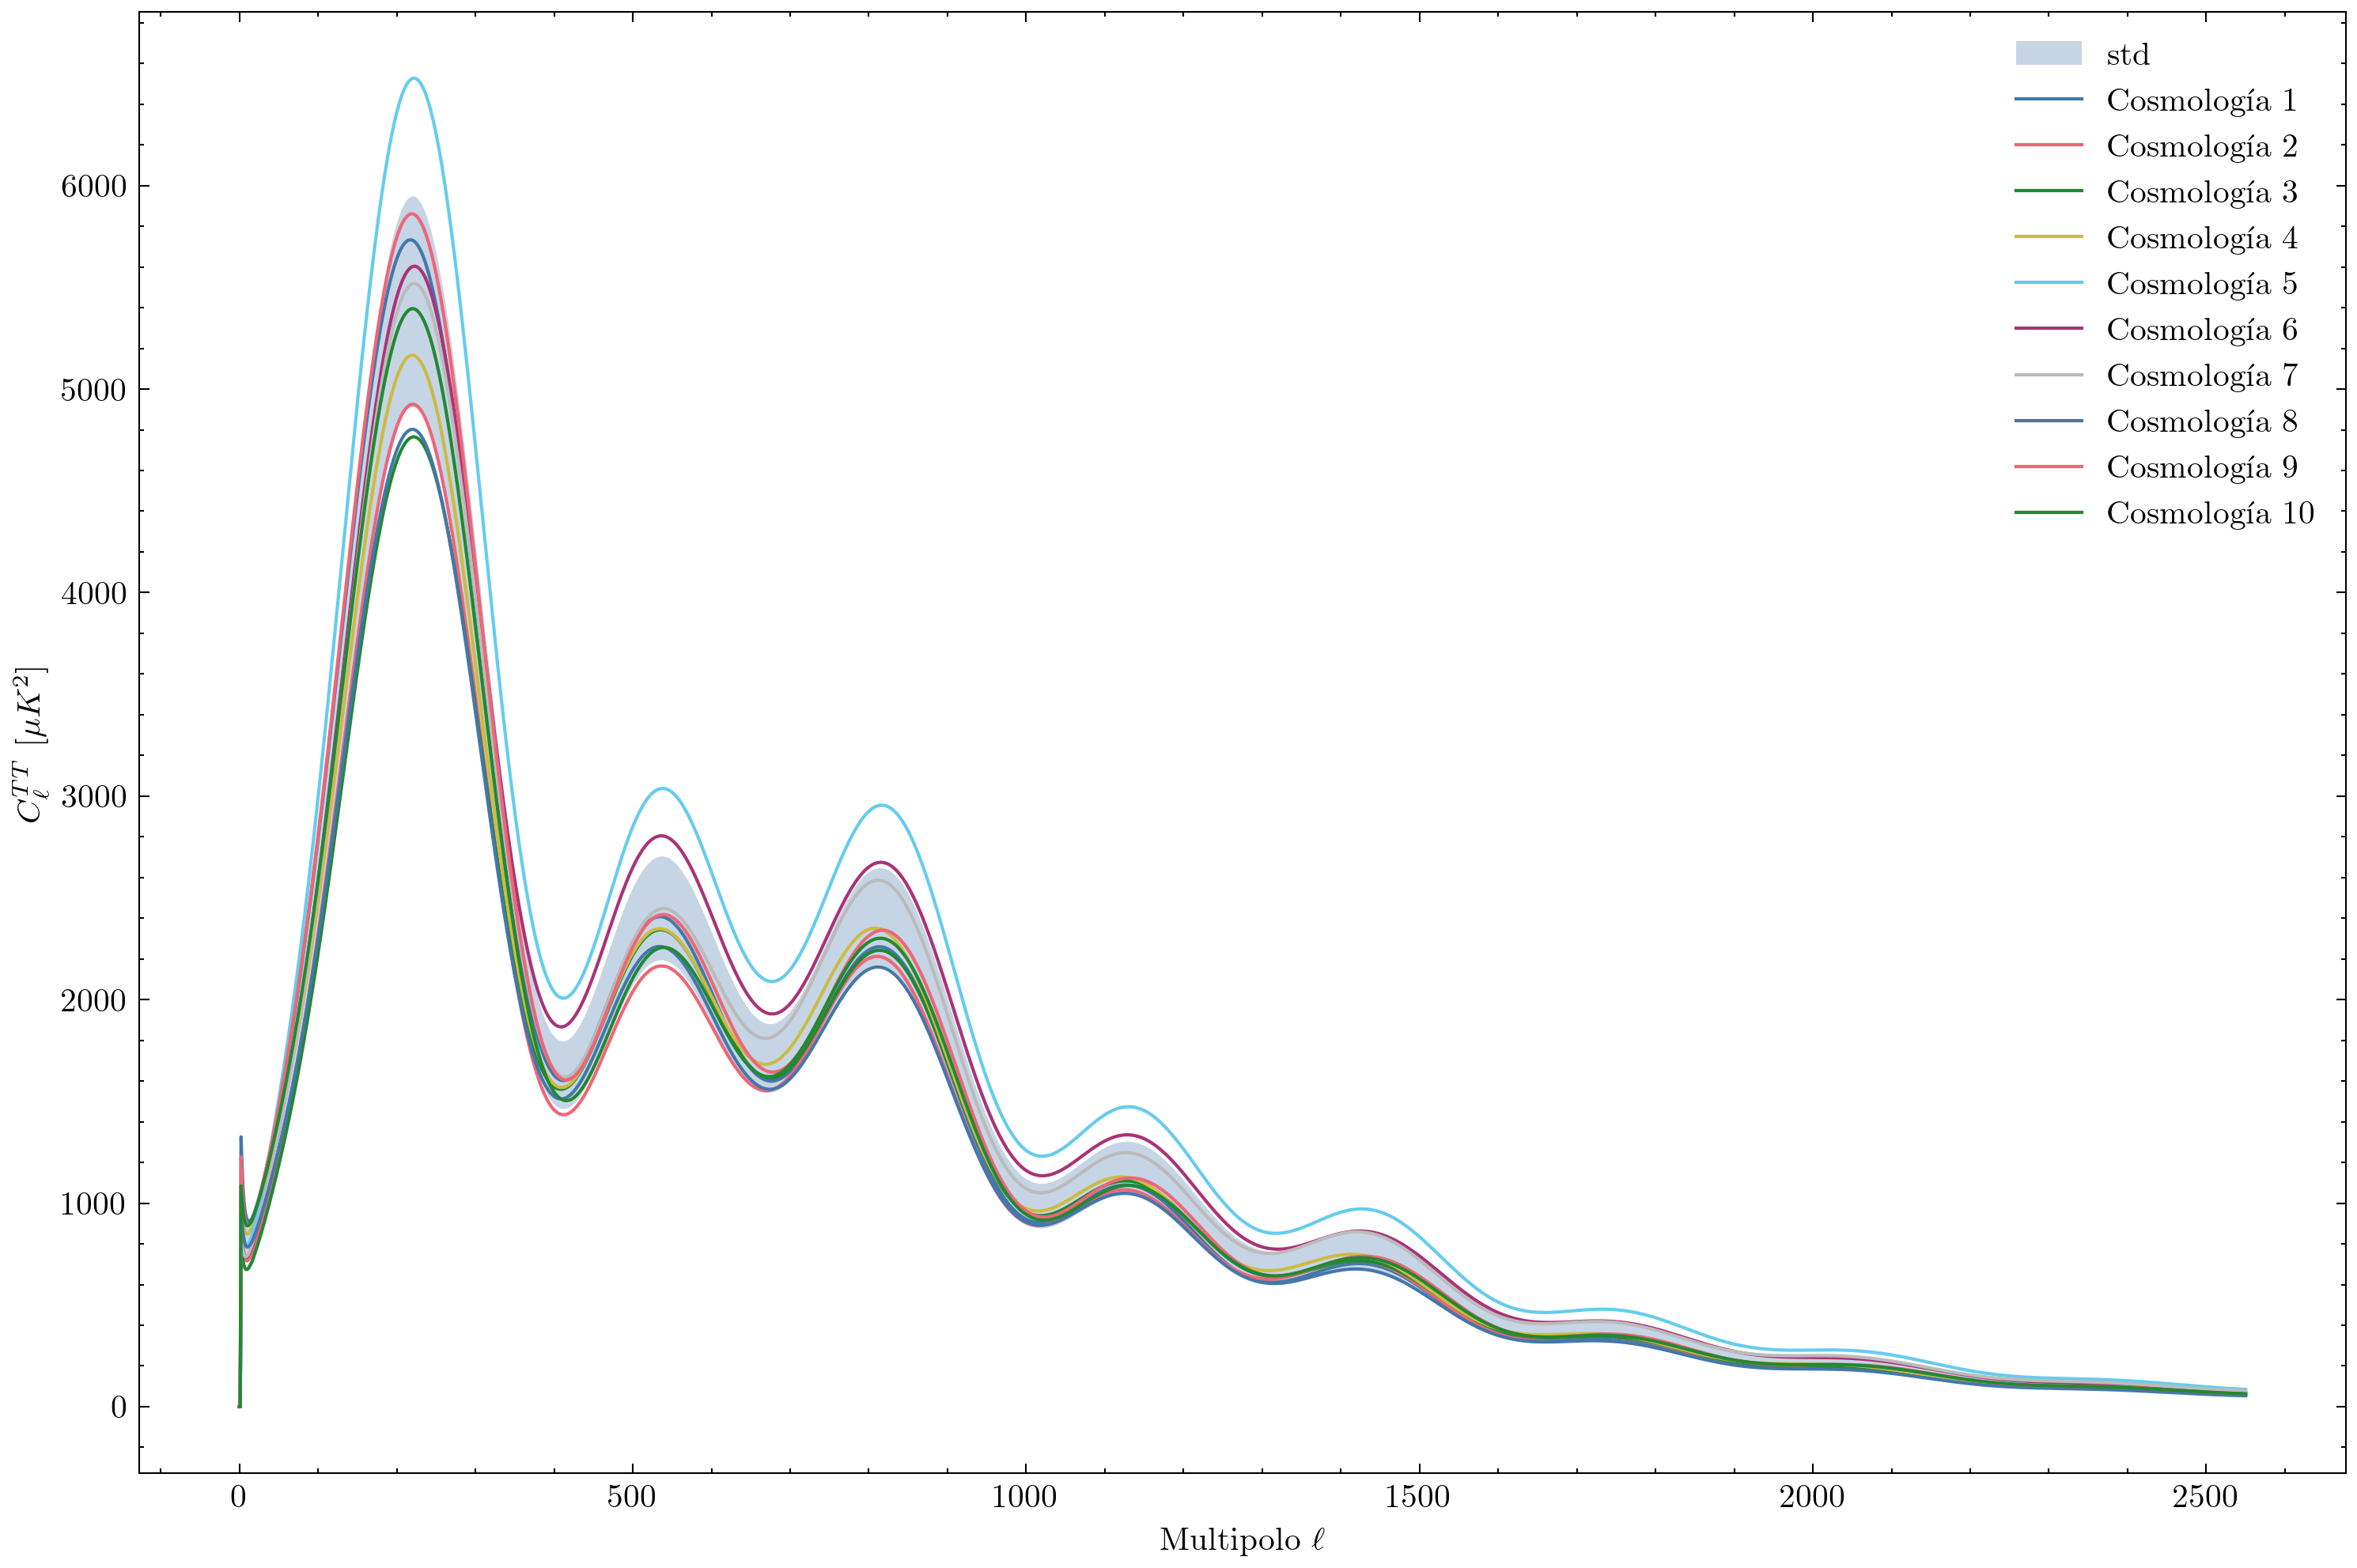

In [4]:
mean_Cl = np.mean(base_spectra.numpy(), axis=0)
std_Cl = np.std(base_spectra.numpy(), axis=0)

plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl - std_Cl, mean_Cl + std_Cl, alpha=0.3, label='std')
for i in range(10):  
    plt.plot(base_spectra[i, :], label=f'Cosmología {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

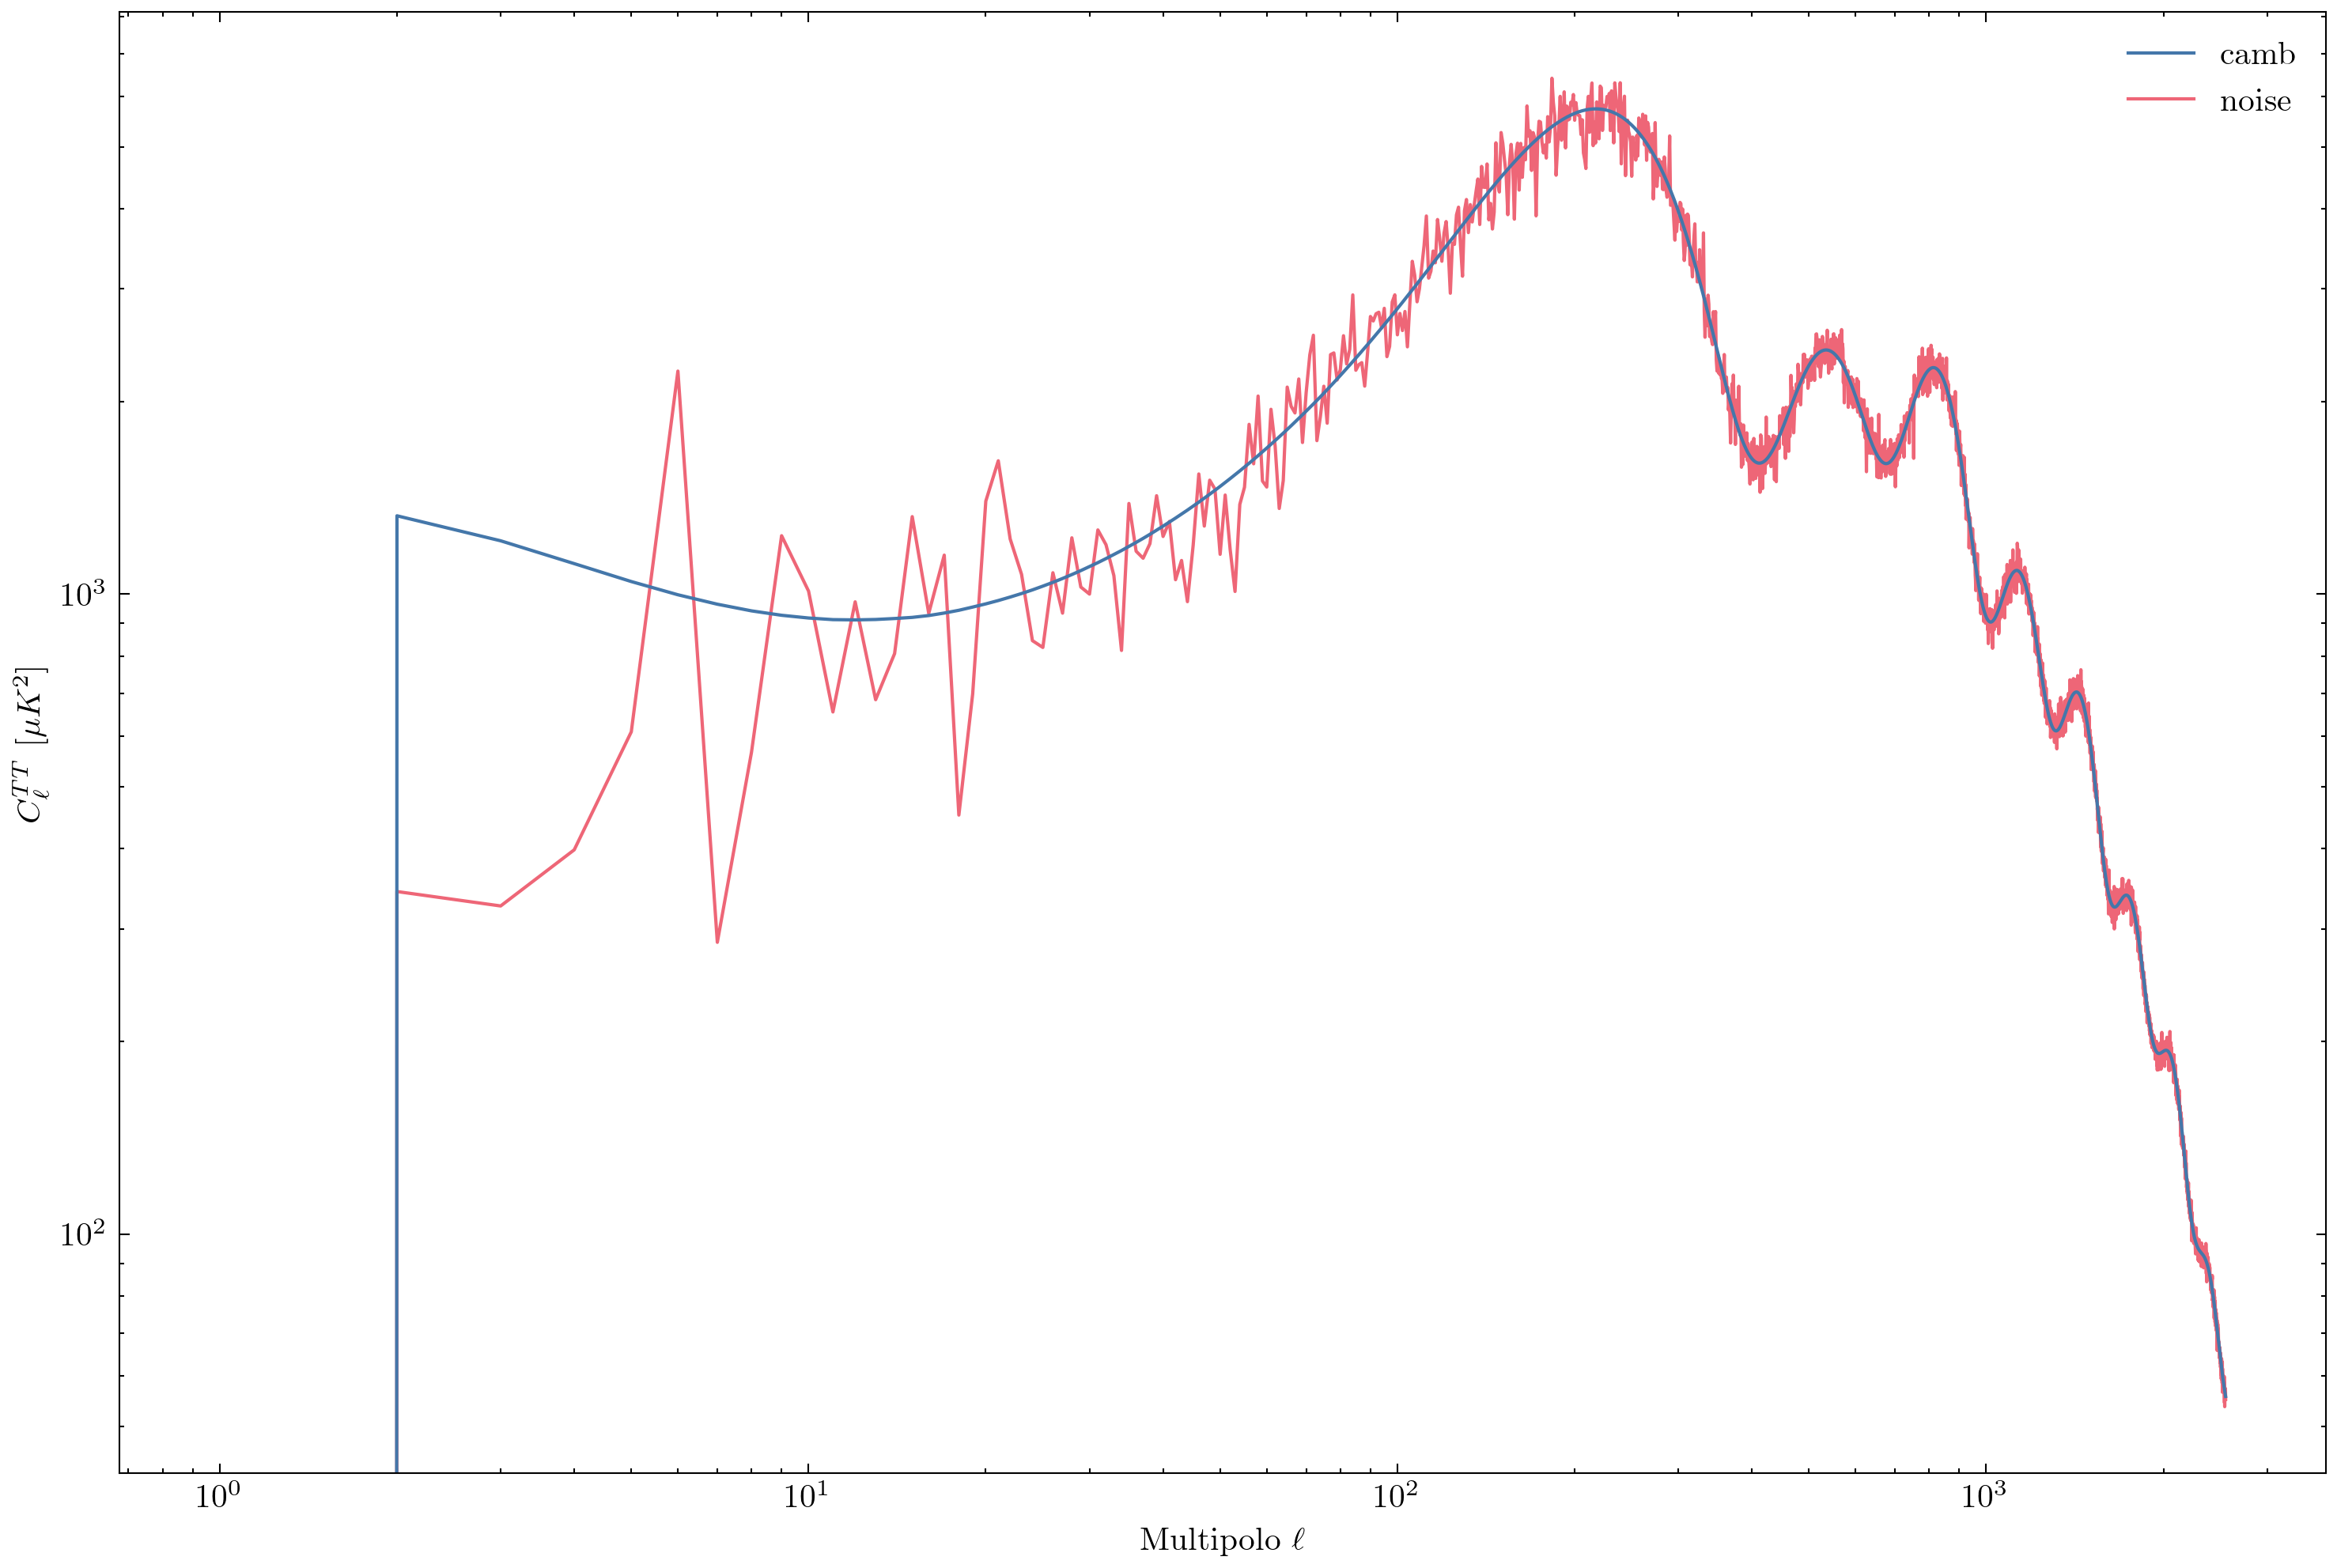

In [5]:
from src.simulator.simulator import add_instrumental_noise, sample_observed_spectra

base_example = base_spectra[0]
noise_example = add_instrumental_noise(base_example)
obs_example = sample_observed_spectra(noise_example)

plt.figure(figsize=(12, 8))
plt.loglog(base_example, label=f'camb', zorder=2)
plt.loglog(obs_example, label=f'noise', zorder=1)
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

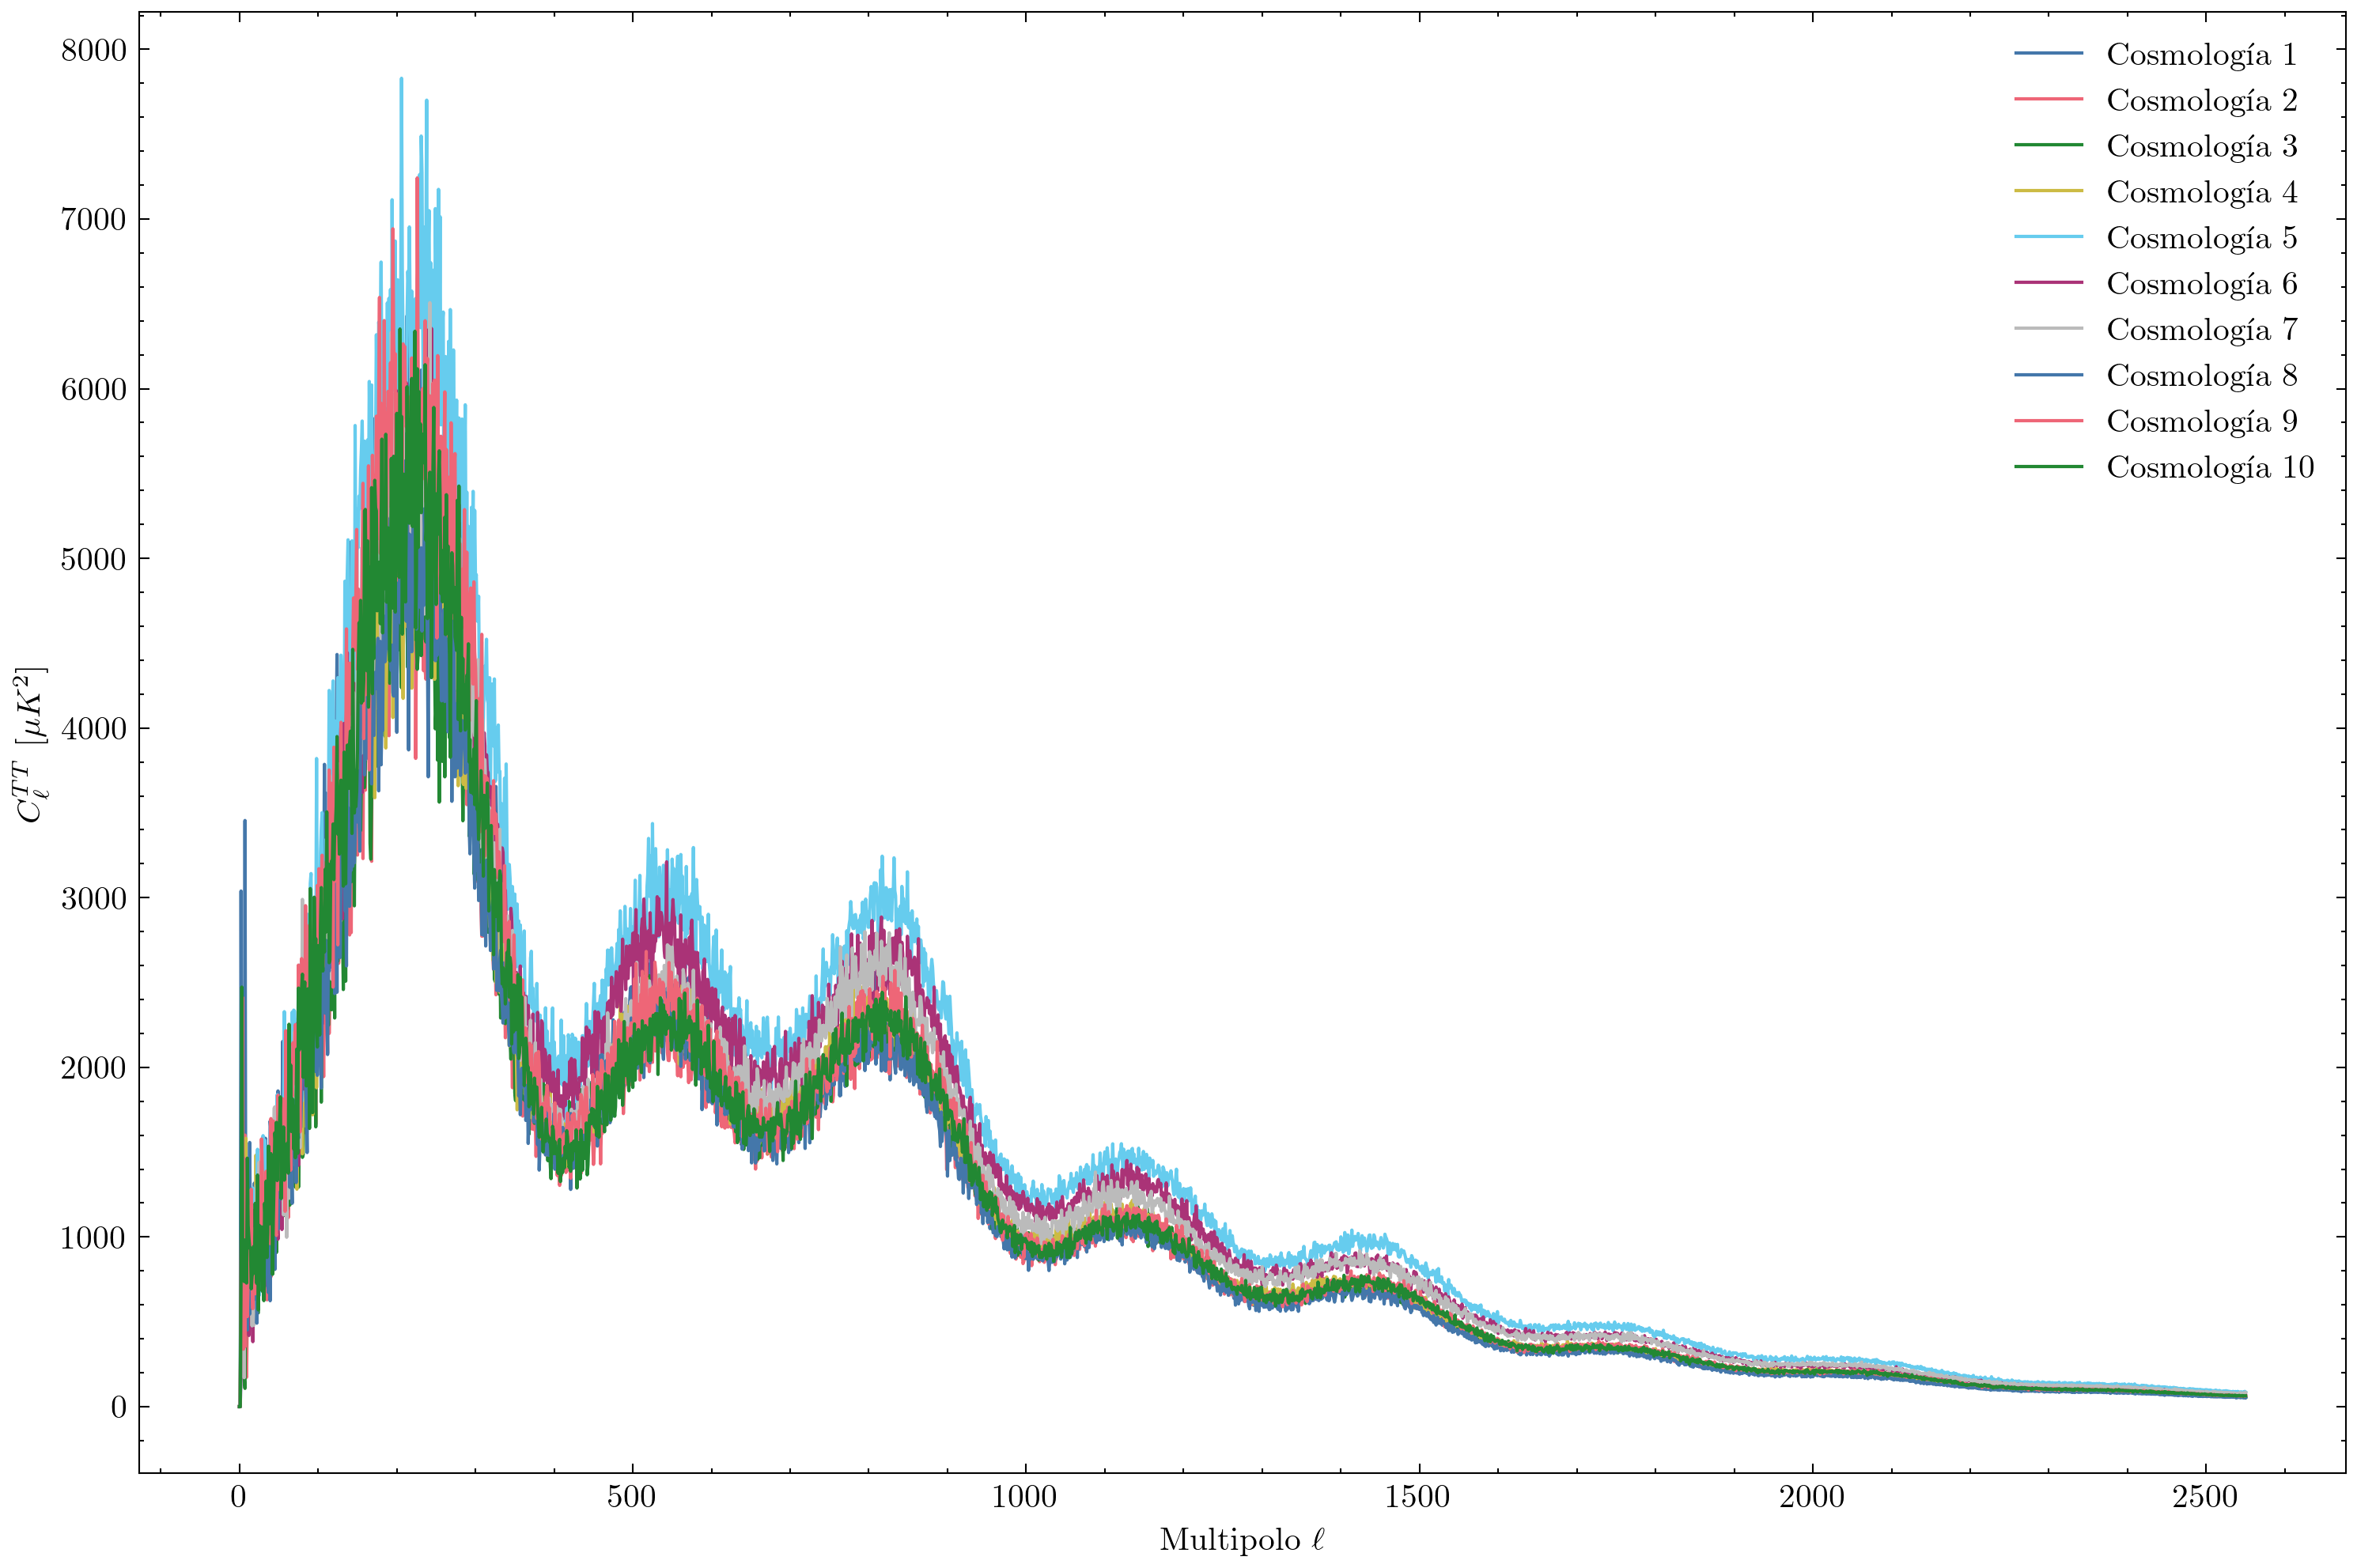

In [6]:
obs_spectra = []
for spectra in base_spectra:
    noisy_spectra = add_instrumental_noise(spectra)
    observed_spectra = sample_observed_spectra(noisy_spectra)
    obs_spectra.append(observed_spectra)

plt.figure(figsize=(12, 8))
for i in range(10):  
    plt.plot(obs_spectra[i], label=f'Cosmología {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()
